In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# Загрузка данных
df = pd.read_csv('Salaries.csv')

# Просмотр первых строк
print("👀 Первые 5 строк данных:")
print(df.head(), '\n')

# Удалим строки с отсутствующей зарплатой
df = df[df['BasePay'].notna()]


👀 Первые 5 строк данных:
   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  

/var/folders/92/tk035x090sg17mmn_cxz9x8h0000gn/T/ipykernel_59779/2129479553.py:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


In [8]:

# Преобразуем BasePay в числовой формат (на всякий случай)
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

# Удалим оставшиеся NaN (если они есть)
df = df.dropna(subset=['BasePay'])


In [9]:

# Топ-10 профессий по средней зарплате
top_10 = df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(10)

print("🔝 Топ-10 профессий по средней зарплате:")
print(top_10, '\n')


🔝 Топ-10 профессий по средней зарплате:
JobTitle
Chief of Police                           309767.683333
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.765000
Mayor                                     275852.530000
Adm, SFGH Medical Center                  265218.780000
EXECUTIVE CONTRACT EMPLOYEE               264452.520000
Controller                                263588.753333
Dept Head V                               259590.712222
Name: BasePay, dtype: float64 



/var/folders/92/tk035x090sg17mmn_cxz9x8h0000gn/T/ipykernel_59779/3593227915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="viridis")


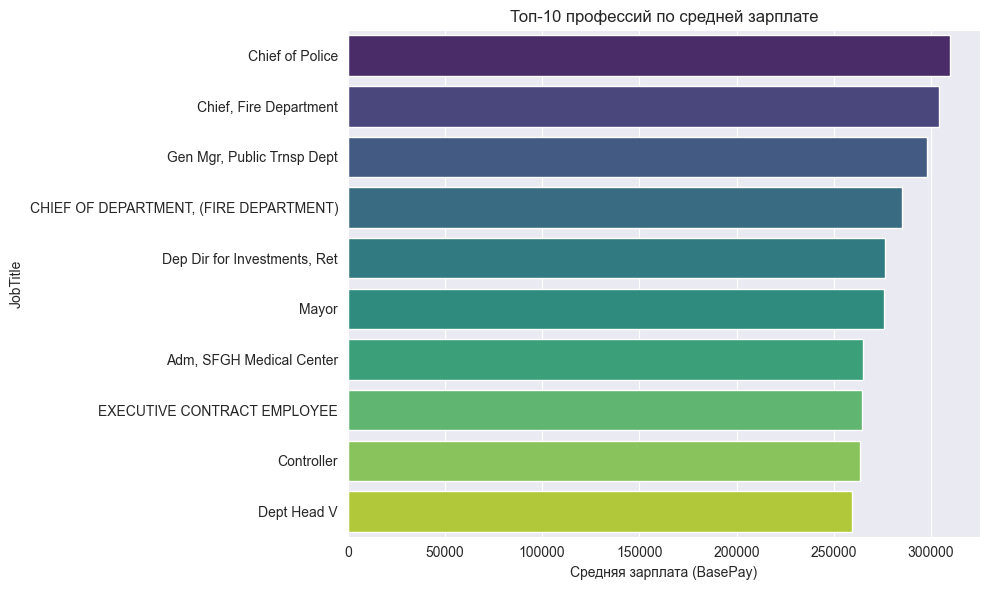

In [10]:

# 📊 Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette="viridis")
plt.xlabel("Средняя зарплата (BasePay)")
plt.title("Топ-10 профессий по средней зарплате")
plt.tight_layout()
plt.show()
